# Keras introduction

Keras is a more high-level neural network library than TensorFlow and can use TensorFlow as a backend, and is supported by the TensorFlow developers. Keras features implementations of neural network layers (including dropout, batch normalization and pooling), objectives, activation functions, optimizers, and features support for convolutional and recurrent neural networks. Keras is perhaps one of the better options for rapid prototyping of deep learning algorithms.

Models in Keras are of two forms, Sequential and Functional API. The Sequential approach enables stacking of sequential and recurrent layers ordering from input to output while the Functional API approach enables more complicated arcitectures.

Keras features callbacks utilities which can be used to track variables during training. These can be used to create checkpoints at which models are saved while training in case of crashes and whatnot. A callback class, which is a class that inherits from `keras.callbacks.Callback`, is passed to the model fitting function and could be used to log something like the accuracy as training is progressing. More specifically, `keras.callbacks.Callback` has methods that can be overridden in a callback class definition; methods such as the following:

- `on_train_begin`
- `on_epoch_end`
- `on_batch_begin`
- `on_batch_end`

These are moments in training at which things can be done. Useful in overriding these methods is the `logs` dictionary which, by default, holds loss and accuracy during training.

# example: Keras 2D convolutional neural network on MNIST

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model
import matplotlib.pylab as plt

Using TensorFlow backend.


In [2]:
# input dimensions
img_x       = 28
img_y       = 28

In [3]:
# Load MNIST data into training and testing datasets. The x data are the features and the y data are the labels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10

In [4]:
# Reshape the data into a 4D tensor (sample_number, x_img_size, y_img_size, num_channels).
# MNIST is greyscale, which corresponds to a single channel/dimension.
# Alternatively, color, for example RGB, would correspond to three channels/dimensions.
x_train     = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test      = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# Cast the data as type float32.
x_train     = x_train.astype('float32')
x_test      = x_test.astype('float32')
x_train     = x_train / 255
x_test      = x_test  / 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# Convert class vectors to binary class matrices for use in the categorical_crossentropy loss.
y_train     = keras.utils.to_categorical(y_train, num_classes)
y_test      = keras.utils.to_categorical(y_test, num_classes)

In [6]:
y_train[0] # labels

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
y_train.shape

(60000, 10)

In [8]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
model = Sequential()

# Add a 2D convolutional layer to process the 2D input (image) data.
model.add(
    Conv2D(
        32,                       # number of output channels
        kernel_size = (5, 5),     # kernel: 5 x 5 moving window
        strides     = (1, 1),     # kernel strides in the x and y dimensions
        activation  = 'relu',     # activation function: ReLU
        input_shape = input_shape # input size/shape
    )
)
# Add a 2D max pooling layer.
model.add(
    MaxPooling2D(
        pool_size   = (2, 2),     # size of the pooling in the x and y dimensions
        strides     = (2, 2)      # strides in the x and y dimensions
    )
)
# Add a convolutional layer. The input tensor for this layer is (batch_size, 28, 28, 32),
# where 28 x 28 corresponds to the input dimensions and 32 is the number of output channels from the previous layer.
model.add(
    Conv2D(
        64,                       # number of output channels
        (5, 5),                   # kernel: 5 x 5 moving window
        strides     = (1, 1),     # kernel strides in x and y dimensions -- default: (1, 1)
        activation  = 'relu'      # activation function: ReLU
    )
)
# Add a dropout layer.
model.add(Dropout(0.5))
# Add a 2D max pooling layer.
model.add(
    MaxPooling2D(
        pool_size   = (2, 2)      # size of the pooling in the x and y dimensions
    )
)
# Flatten the output from convolutional layers to prepare them for input to fully-connected layers.
model.add(Flatten())
# Specify a fully-connected layer.
model.add(
    Dense(
        1000,                     # number of nodes
        activation  = 'relu'      # activation function: ReLU
    )
)
# Specify a fully-connected output layer.
model.add(
    Dense(
        num_classes,              # number of classes
        activation  = 'softmax'   # softmax classification
    )
)
plot_model(model, to_file="model.png")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1025000   
__________

In [10]:
model.compile(
    loss            = keras.losses.categorical_crossentropy,
    optimizer       = keras.optimizers.Adam(), # alternative: keras.optimizers.SGD(lr = 0.01)
    metrics         = ['accuracy']
)

# Define a callback class which is to be passed to the model fitting function
# as an element of a list of possible callbacks.
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs = {}):
        self.acc = []
    def on_epoch_end(self, batch, logs = {}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath       = 'best_model.{epoch:02d}-{val_loss:.2f}.h5',
    monitor        = 'val_loss',
    save_best_only = True
)

In [11]:
epochs = 50

model.fit(
    x_train,
    y_train,
    batch_size      = 512,
    epochs          = epochs,
    verbose         = 1,
    validation_data = (x_test, y_test),
    callbacks       = [history, checkpoint]
)
score = model.evaluate(x_test, y_test, verbose = False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.2944 - acc: 0.9145 - val_loss: 0.0876 - val_acc: 0.9816
Epoch 2/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0686 - acc: 0.9788 - val_loss: 0.0600 - val_acc: 0.9859
Epoch 3/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0487 - acc: 0.9849 - val_loss: 0.0450 - val_acc: 0.9892
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0381 - acc: 0.9879 - val_loss: 0.0353 - val_acc: 0.9912
Epoch 5/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0305 - acc: 0.9907 - val_loss: 0.0405 - val_acc: 0.9889
Epoch 6/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.0285 - acc: 0.9900 - val_loss: 0.0301 - val_acc: 0.9911
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0223 - acc: 0.9929 - val_loss: 0.0269 - val_acc

test loss: 0.02079192531554181
test accuracy: 0.9936


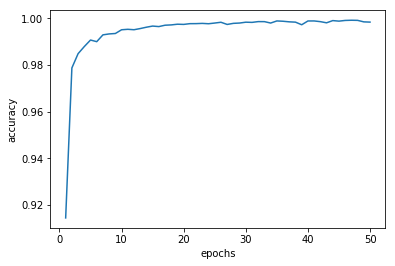

In [12]:
print('test loss:', score[0])
print('test accuracy:', score[1])
plt.plot(range(1, epochs + 1), history.acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()